In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [2]:
import numpy as np 
import pandas as pd 

np.set_printoptions(threshold = 1e6)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)


import matplotlib.pyplot as plt 
import seaborn as sns 


from matplotlib import rcParams
from matplotlib.cm import rainbow

In [3]:
dataset = spark.read.csv('Datasets/heart_disease_dataset.csv', inferSchema=True, header=True)

In [4]:
dataset=dataset.toPandas()

In [5]:
dataset.shape

(1025, 15)

In [6]:
print(dataset.head())

   ID  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   1   52    1   0       125   212    0        1      168      0      1.0      2   2     3       0
1   2   53    1   0       140   203    1        0      155      1      3.1      0   0     3       0
2   3   70    1   0       145   174    0        1      125      1      2.6      0   0     3       0
3   4   61    1   0       148   203    0        1      161      0      0.0      2   1     3       0
4   5   62    0   0       138   294    1        1      106      0      1.9      1   3     2       0


In [7]:
dataset.isnull().sum().any()

False

In [8]:
dataset. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
ID          1025 non-null int64
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(14)
memory usage: 120.2 KB


In [9]:
S = dataset.describe()
print(round(S,2))

            ID      age      sex       cp  trestbps     chol      fbs  restecg  thalach    exang  oldpeak    slope       ca     thal   target
count  1025.00  1025.00  1025.00  1025.00   1025.00  1025.00  1025.00  1025.00  1025.00  1025.00  1025.00  1025.00  1025.00  1025.00  1025.00
mean    513.00    54.43     0.70     0.94    131.61   246.00     0.15     0.53   149.11     0.34     1.07     1.39     0.75     2.32     0.51
std     296.04     9.07     0.46     1.03     17.52    51.59     0.36     0.53    23.01     0.47     1.18     0.62     1.03     0.62     0.50
min       1.00    29.00     0.00     0.00     94.00   126.00     0.00     0.00    71.00     0.00     0.00     0.00     0.00     0.00     0.00
25%     257.00    48.00     0.00     0.00    120.00   211.00     0.00     0.00   132.00     0.00     0.00     1.00     0.00     2.00     0.00
50%     513.00    56.00     1.00     1.00    130.00   240.00     0.00     1.00   152.00     0.00     0.80     1.00     0.00     2.00     1.00
75%   

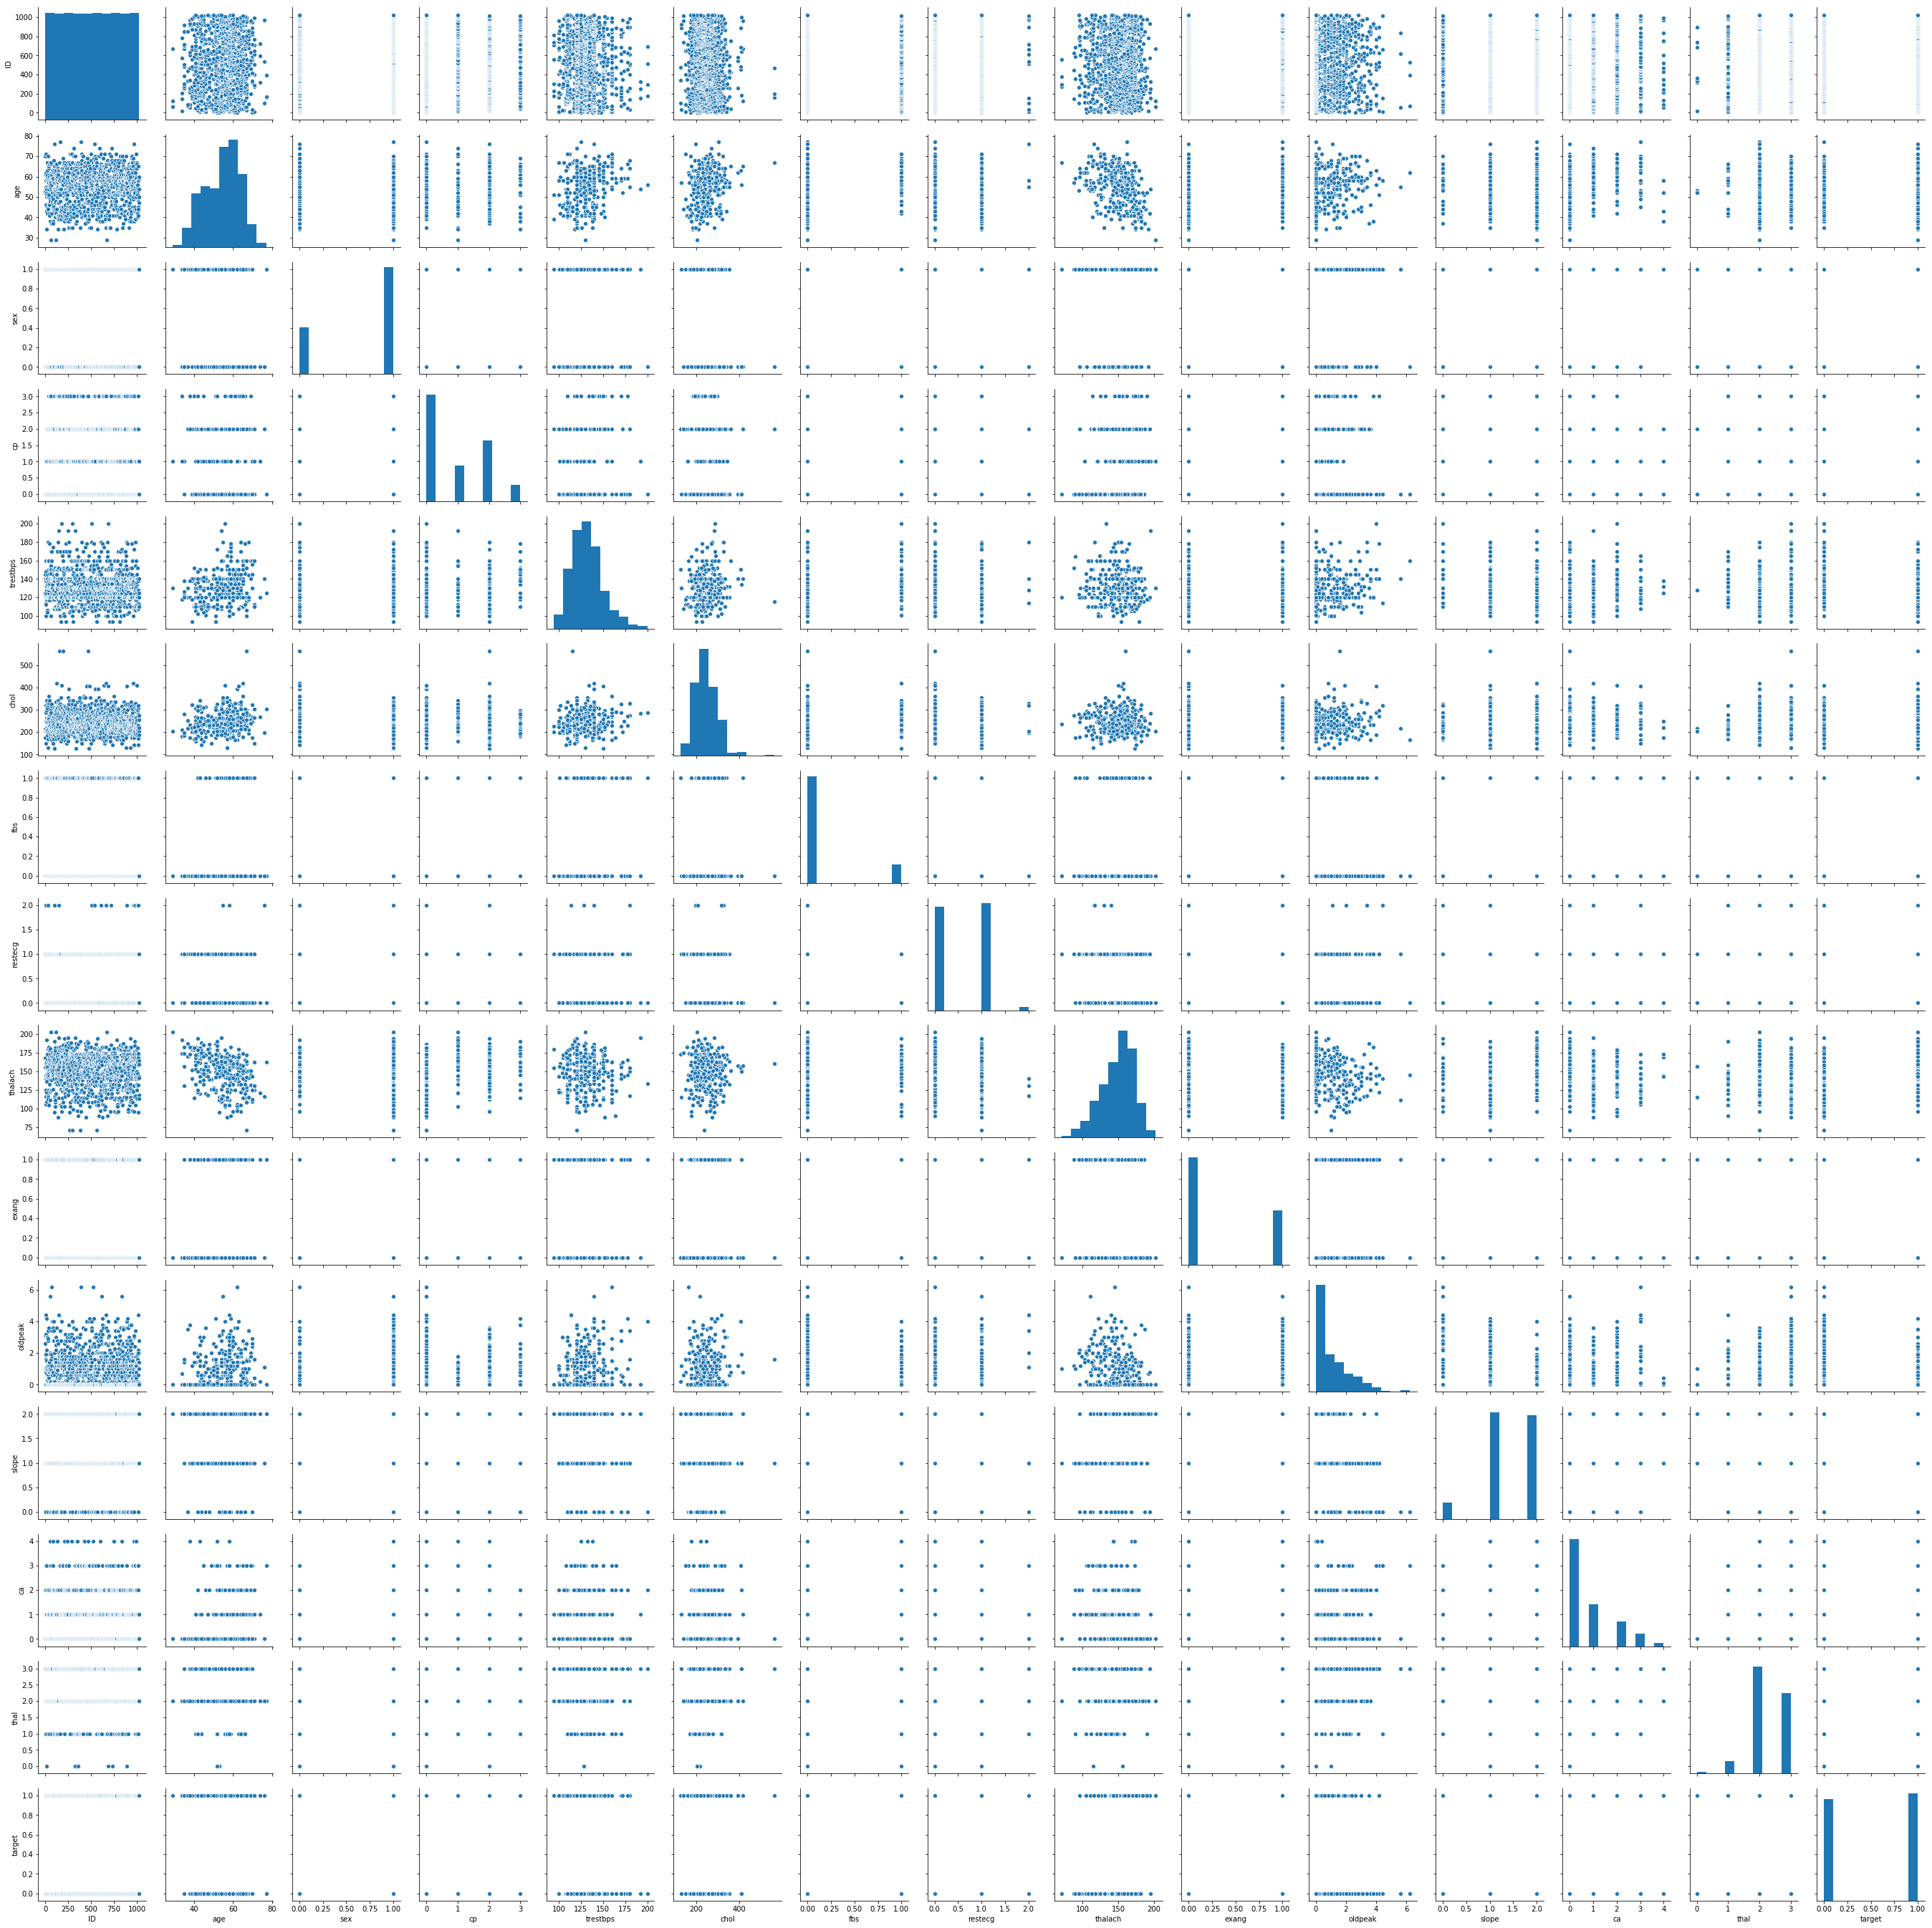

In [10]:
 sns.pairplot(dataset)

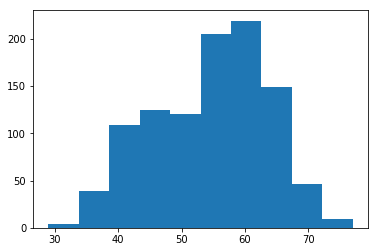

In [11]:
dataset['age'].hist(grid=False)

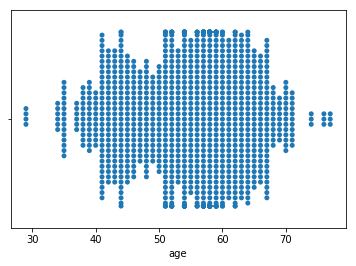

In [12]:
sns.swarmplot(dataset['age'])


In [13]:
dataset['target'].nunique()


2

In [14]:
dataset['target'].unique()

array([0, 1])

In [15]:
dataset['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

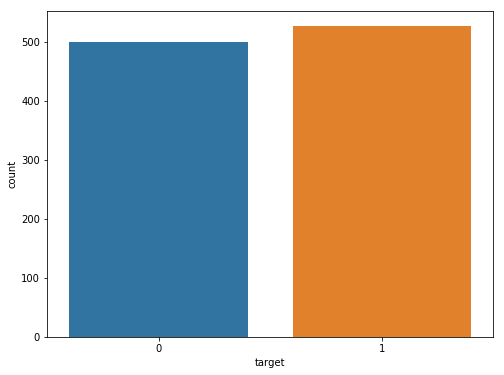

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=dataset)
plt.show()

In [17]:
dataset.groupby('sex')['target'].value_counts()

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64

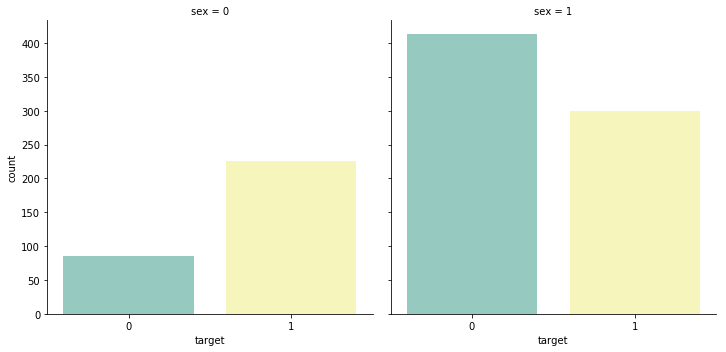

In [18]:
ax = sns.catplot(x="target", col="sex", data=dataset, palette="Set3", kind="count", height=5, aspect=1)

In [19]:
dataset['cp'].nunique()


4

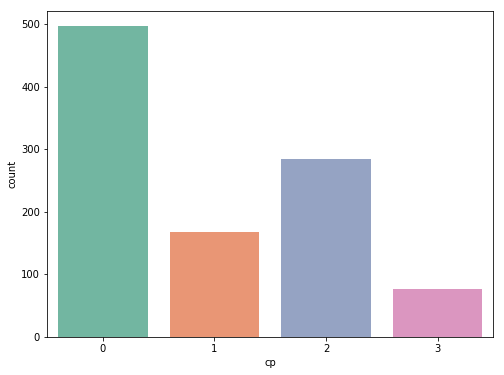

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", data=dataset,palette="Set2")
plt.show()

In [21]:
dataset.cp.replace(to_replace=[0,1,2,3],value=['general','sevior','moderate','critical'],inplace=True)

In [22]:
dataset.cp.unique()

array(['general', 'sevior', 'moderate', 'critical'], dtype=object)

In [23]:
dataset['cp'].value_counts()

general     497
moderate    284
sevior      167
critical     77
Name: cp, dtype: int64

In [24]:
general_cp=[i for i in  dataset.cp if i=='general']
sevior_cp=[i for i in  dataset.cp if i=='sevior']
moderate_cp=[i for i in  dataset.cp if i=='moderate']
critical_cp=[i for i in  dataset.cp if i=='critical']
print('People with Level-1 Pain :',len(general_cp))
print('People with Level-2 Pain :',len(moderate_cp))
print('People with Level-3 Pain :',len(sevior_cp))
print('People with Level-4 Pain :',len(critical_cp))

People with Level-1 Pain : 497
People with Level-2 Pain : 284
People with Level-3 Pain : 167
People with Level-4 Pain : 77


In [25]:
general_cpp=(len(general_cp)*100)/len(dataset.cp)
sevior_cpp=(len(sevior_cp)*100)/len(dataset.cp)
moderate_cpp=(len(moderate_cp)*100)/len(dataset.cp)
critical_cpp=(len(critical_cp)*100)/len(dataset.cp)
print('\n')
print('Percentage with Level-1 Pain :',str(general_cpp)+' %')
print('Percentage with Level-2 Pain :',str(sevior_cpp)+' %')
print('Percentage with Level-3 Pain :',str(moderate_cpp)+' %')
print('Percentage with Level-4 Pain :',str(critical_cpp)+' %')



Percentage with Level-1 Pain : 48.48780487804878 %
Percentage with Level-2 Pain : 16.29268292682927 %
Percentage with Level-3 Pain : 27.70731707317073 %
Percentage with Level-4 Pain : 7.512195121951219 %


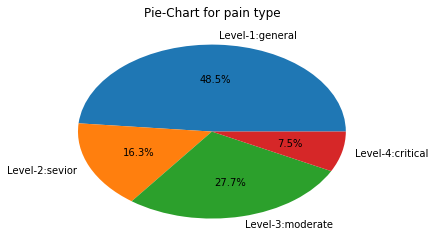

In [26]:
labels=['Level-1:general','Level-2:sevior','Level-3:moderate','Level-4:critical']
values=[general_cpp,sevior_cpp,moderate_cpp,critical_cpp]
plt.pie(values,labels=labels,wedgeprops={'linewidth':3},autopct='%1.1f%%')
plt.title('Pie-Chart for pain type')
plt.show()

In [27]:
dataset.groupby('cp')['target'].value_counts()


cp        target
critical  1          51
          0          26
general   0         375
          1         122
moderate  1         219
          0          65
sevior    1         134
          0          33
Name: target, dtype: int64

In [28]:
dataset['thalach'].nunique()

91

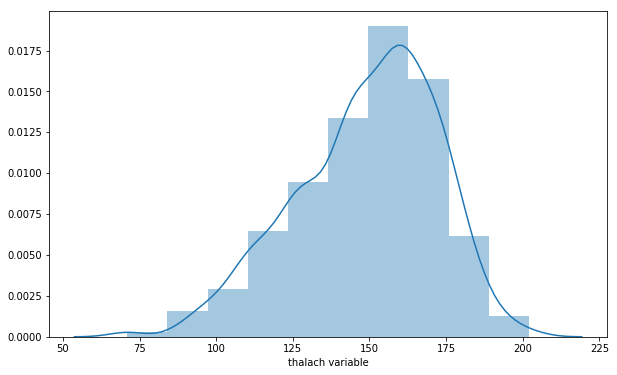

In [29]:
f, ax = plt.subplots(figsize=(10,6))
x = dataset['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.distplot(x, bins=10)
plt.show()

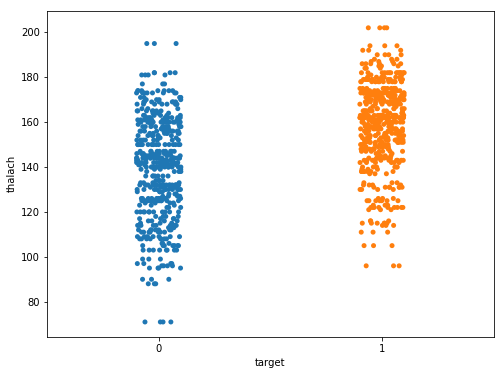

In [30]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=dataset)
plt.show()

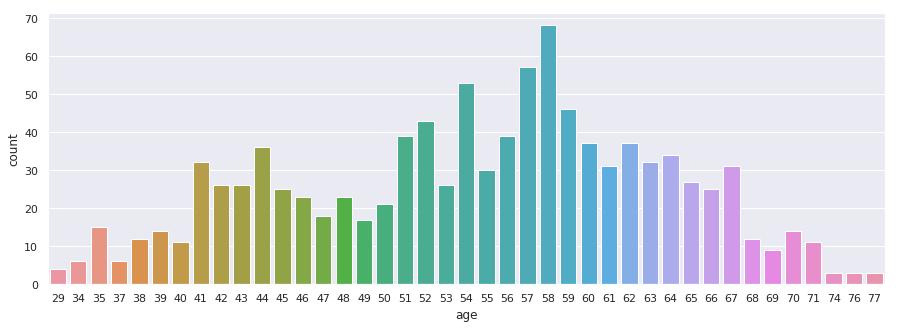

In [31]:
plt.figure(figsize=(15,5))
sns.set()
sns.countplot(dataset.age)

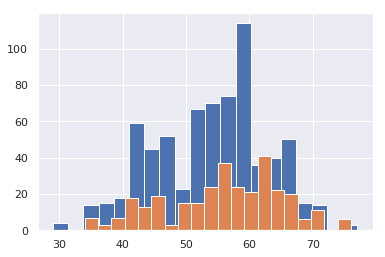

In [32]:
dataset[dataset.sex==1].age.hist(bins=20)
dataset[dataset.sex==0].age.hist(bins=20)

In [33]:
dataset.isnull().sum()

ID          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
#outliers for Categorical data
print(np.char.center(" Unique values of categorical variables ", 60, fillchar = "*"))
print("\nSex: ", dataset.sex.unique())
print("Cp: ", sorted(dataset.cp.unique()))
print("fbs: ", sorted(dataset.fbs.unique()))
print("restecg: ", sorted(dataset.restecg.unique()))
print("exang: ", sorted(dataset.exang.unique()))
print("slope: ", sorted(dataset.slope.unique()))
print("ca: ", sorted(dataset.ca.unique()))
print("thal: ", sorted(dataset.thal.unique()))
print("target: ", sorted(dataset.target.unique()))

********** Unique values of categorical variables **********

Sex:  [1 0]
Cp:  ['critical', 'general', 'moderate', 'sevior']
fbs:  [0, 1]
restecg:  [0, 1, 2]
exang:  [0, 1]
slope:  [0, 1, 2]
ca:  [0, 1, 2, 3, 4]
thal:  [0, 1, 2, 3]
target:  [0, 1]


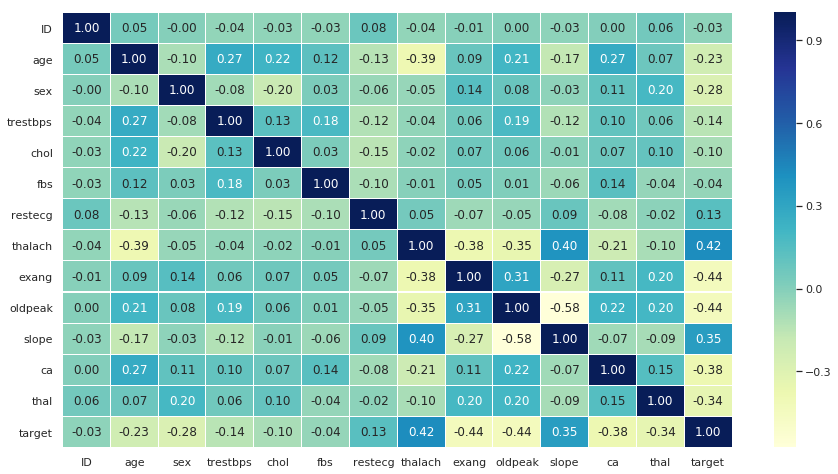

In [35]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(dataset.corr(), annot = True,linewidths=0.05, fmt= '.2f',cmap="YlGnBu")
plt.show()

In [36]:
dataset = dataset.drop(['ID'], axis=1)
print(dataset.head())

   age  sex       cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   52    1  general       125   212    0        1      168      0      1.0      2   2     3       0
1   53    1  general       140   203    1        0      155      1      3.1      0   0     3       0
2   70    1  general       145   174    0        1      125      1      2.6      0   0     3       0
3   61    1  general       148   203    0        1      161      0      0.0      2   1     3       0
4   62    0  general       138   294    1        1      106      0      1.9      1   3     2       0


In [37]:
dataset.shape

(1025, 14)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text xticklabel objects>)

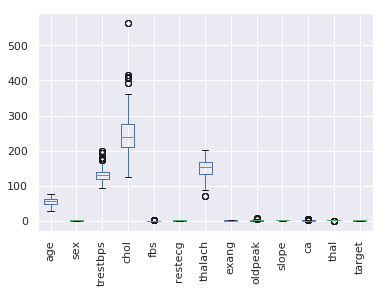

In [38]:
dataset.boxplot()
plt.xticks(rotation = 90)

In [39]:
dataset.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [40]:
print(dataset.head())

   age  sex chest_pain_type  resting_blood_pressure  cholesterol  fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  exercise_induced_angina  st_depression  st_slope  num_major_vessels  thalassemia  target
0   52    1         general                     125          212                    0         1                      168                        0            1.0         2                  2            3       0
1   53    1         general                     140          203                    1         0                      155                        1            3.1         0                  0            3       0
2   70    1         general                     145          174                    0         1                      125                        1            2.6         0                  0            3       0
3   61    1         general                     148          203                    0         1                      161                        0           

In [41]:
dataset['sex'][dataset['sex'] == 0] = 'female'
dataset['sex'][dataset['sex'] == 1] = 'male'

dataset['chest_pain_type'][dataset['chest_pain_type'] == 1] = 'typical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 2] = 'atypical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 3] = 'non-anginal pain'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 4] = 'asymptomatic'

dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dataset['rest_ecg'][dataset['rest_ecg'] == 0] = 'normal'
dataset['rest_ecg'][dataset['rest_ecg'] == 1] = 'ST-T wave abnormality'
dataset['rest_ecg'][dataset['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dataset['exercise_induced_angina'][dataset['exercise_induced_angina'] == 0] = 'no'
dataset['exercise_induced_angina'][dataset['exercise_induced_angina'] == 1] = 'yes'

dataset['st_slope'][dataset['st_slope'] == 1] = 'upsloping'
dataset['st_slope'][dataset['st_slope'] == 2] = 'flat'
dataset['st_slope'][dataset['st_slope'] == 3] = 'downsloping'

dataset['thalassemia'][dataset['thalassemia'] == 1] = 'normal'
dataset['thalassemia'][dataset['thalassemia'] == 2] = 'fixed defect'
dataset['thalassemia'][dataset['thalassemia'] == 3] = 'reversable defect'

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/ubuntu/.local/lib/python3.5/site-pack

In [42]:
dataset.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [43]:
dataset['sex'] = dataset['sex'].astype('object')
dataset['chest_pain_type'] = dataset['chest_pain_type'].astype('object')
dataset['fasting_blood_sugar'] = dataset['fasting_blood_sugar'].astype('object')
dataset['rest_ecg'] = dataset['rest_ecg'].astype('object')
dataset['exercise_induced_angina'] = dataset['exercise_induced_angina'].astype('object')
dataset['st_slope'] = dataset['st_slope'].astype('object')
dataset['thalassemia'] = dataset['thalassemia'].astype('object')

In [44]:
dataset.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [45]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [46]:
dataset.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_general,chest_pain_type_moderate,chest_pain_type_sevior,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
3,61,148,203,161,0.0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1
4,62,138,294,106,1.9,3,0,0,1,0,0,0,0,0,0,0,1,1,0,0


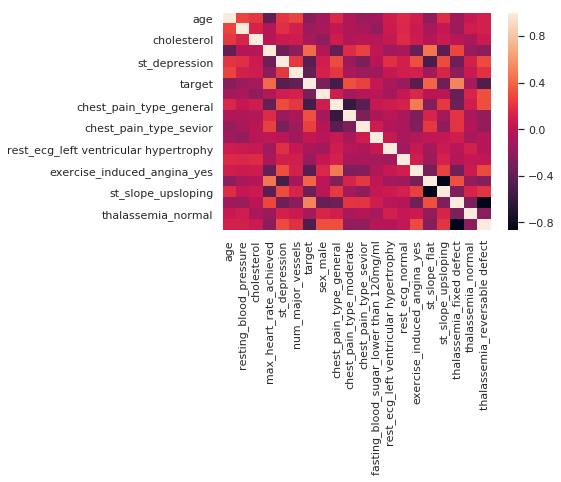

In [47]:
sns.heatmap(dataset.corr())

(array([1]), <a list of 1 Text xticklabel objects>)

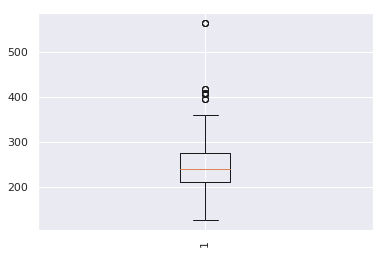

In [48]:
#plt.boxplot(dataset.cholesterol)
plt.boxplot(dataset.cholesterol)
plt.xticks(rotation = 90)

In [49]:
Q3 = dataset.cholesterol.quantile(.75)
Q1 = dataset.cholesterol.quantile(.25)
IQR = Q3 - Q1
dataset = dataset[~((dataset.cholesterol < Q1 - 1.5*IQR) | (dataset.cholesterol > Q3 + 1.5*IQR))]

(array([1]), <a list of 1 Text xticklabel objects>)

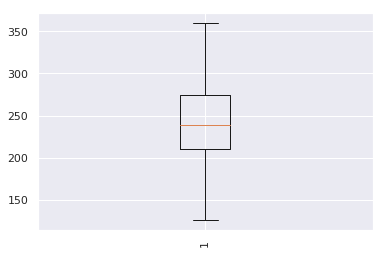

In [50]:
#plt.boxplot(dataset.cholesterol)
plt.boxplot(dataset.cholesterol)
plt.xticks(rotation = 90)

(array([1]), <a list of 1 Text xticklabel objects>)

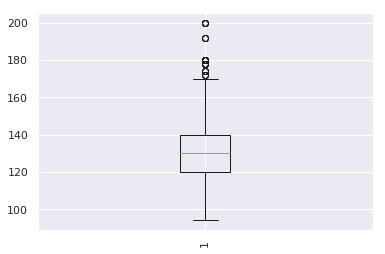

In [51]:
#plt.boxplot(dataset.resting_blood_pressure)
plt.boxplot(dataset.resting_blood_pressure)
plt.xticks(rotation = 90)

In [52]:
Q3 = dataset.resting_blood_pressure.quantile(.75)
Q1 = dataset.resting_blood_pressure.quantile(.25)
IQR = Q3 - Q1
dataset = dataset[~((dataset.resting_blood_pressure < Q1 - 1.5*IQR) | (dataset.resting_blood_pressure > Q3 + 1.5*IQR))]

(array([1]), <a list of 1 Text xticklabel objects>)

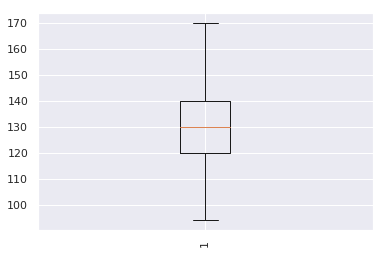

In [53]:
#plt.boxplot(dataset.resting_blood_pressure)
plt.boxplot(dataset.resting_blood_pressure)
plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text xticklabel objects>)

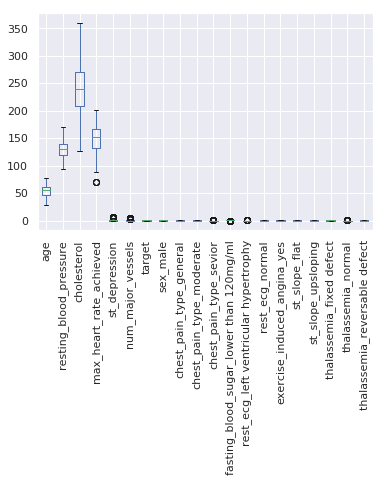

In [54]:
dataset.boxplot()
plt.xticks(rotation = 90)

In [55]:
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
scale_column=['age','resting_blood_pressure','max_heart_rate_achieved','st_depression']
dataset[scale_column]= standardScaler.fit_transform(dataset[scale_column])


In [56]:
print(dataset)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  st_depression  num_major_vessels  target  sex_male  chest_pain_type_general  chest_pain_type_moderate  chest_pain_type_sevior  fasting_blood_sugar_lower than 120mg/ml  rest_ecg_left ventricular hypertrophy  rest_ecg_normal  exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  thalassemia_fixed defect  thalassemia_normal  thalassemia_reversable defect
0    -0.236239               -0.324802          212                 0.819277      -0.030670                  2       0         1                        1                         0                       0                                        1                                      0                0                            0              1                   0                         0                   0                              1
1    -0.126577                0.652599          203                 0.259442       1.807625                  0      

In [57]:
#Model
dataset = spark.createDataFrame(dataset)

In [58]:
from pyspark.sql.types import IntegerType,FloatType
dataset = dataset.withColumn("target", dataset["target"].cast(IntegerType()))

In [59]:
#%%DMAS
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import (VectorAssembler)
inputColumn = VectorAssembler(inputCols=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression',
                                       'num_major_vessels','sex_male','chest_pain_type_general',
                                       'chest_pain_type_moderate', 'chest_pain_type_sevior', 'fasting_blood_sugar_lower than 120mg/ml', 'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal'
                                      , 'exercise_induced_angina_yes', 'st_slope_flat', 'st_slope_upsloping', 'thalassemia_fixed defect', 'thalassemia_normal',  
                                      'thalassemia_reversable defect'], outputCol="features")

pipeline = Pipeline(stages=[inputColumn])
pipeline_used_model = pipeline.fit(dataset)
pipe_dataset = pipeline_used_model.transform(dataset)
pipe_dataset = pipe_dataset.select('target', 'features')

In [60]:
pipe_dataset.show()
pipe_dataset.printSchema()

+------+--------------------+
|target|            features|
+------+--------------------+
|     0|(19,[0,1,2,3,4,5,...|
|     0|(19,[0,1,2,3,4,6,...|
|     0|(19,[0,1,2,3,4,6,...|
|     0|(19,[0,1,2,3,4,5,...|
|     0|(19,[0,1,2,3,4,5,...|
|     1|(19,[0,1,2,3,4,7,...|
|     0|(19,[0,1,2,3,4,5,...|
|     0|[0.09274835636438...|
|     0|(19,[0,1,2,3,4,6,...|
|     0|[-0.0169142533949...|
|     1|(19,[0,1,2,3,4,7,...|
|     0|(19,[0,1,2,3,4,7,...|
|     1|(19,[0,1,2,3,4,9,...|
|     0|[-0.3459020826729...|
|     0|(19,[0,1,2,3,4,6,...|
|     1|(19,[0,1,2,3,4,9,...|
|     1|(19,[0,1,2,3,4,5,...|
|     0|[-0.0169142533949...|
|     1|(19,[0,1,2,3,4,9,...|
|     1|(19,[0,1,2,3,4,6,...|
+------+--------------------+
only showing top 20 rows

root
 |-- target: integer (nullable = true)
 |-- features: vector (nullable = true)



In [61]:
(training_data, testing_data) = pipe_dataset.randomSplit([0.7, 0.3])

In [62]:
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [63]:
#DecisionTree Classifiers
dtc = DecisionTreeClassifier(labelCol='target',featuresCol='features',  maxDepth=10, maxBins=64, minInstancesPerNode=5, minInfoGain=0.0, maxMemoryInMB=256, 
                            cacheNodeIds=False, checkpointInterval=10, impurity="gini", seed=None)

In [64]:
#RandomTree Classifiers
rfc = RandomForestClassifier(labelCol='target',featuresCol='features',  numTrees=10, maxDepth=10, seed=10)

In [65]:
#Logisitic regression
lr= LogisticRegression(labelCol='target', featuresCol='features', family='multinomial',
                       maxIter=10, regParam=2, elasticNetParam=0)

In [66]:
# Train the models 
dtc_model = dtc.fit(training_data)
rfc_model = rfc.fit(training_data)
lr_model = lr.fit(training_data)

In [67]:
#Model Comparison
dtc_predictions = dtc_model.transform(testing_data)
rfc_predictions = rfc_model.transform(testing_data)
lr_predictions = lr_model.transform(testing_data)

In [68]:
dtc_predictions.show()

+------+--------------------+-------------+-----------+----------+
|target|            features|rawPrediction|probability|prediction|
+------+--------------------+-------------+-----------+----------+
|     0|(19,[0,1,2,3,4,5,...|   [19.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|   [32.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|   [32.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|  [137.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|   [21.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|  [137.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|  [137.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|  [137.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|  [137.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|  [137.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|   [21.0,0.0]|  [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|   [21.0,0.0]|  [1.0,0.0]|       

In [69]:
rfc_predictions.show()

+------+--------------------+--------------------+--------------------+----------+
|target|            features|       rawPrediction|         probability|prediction|
+------+--------------------+--------------------+--------------------+----------+
|     0|(19,[0,1,2,3,4,5,...|          [10.0,0.0]|           [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|          [10.0,0.0]|           [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|          [10.0,0.0]|           [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|           [8.0,2.0]|           [0.8,0.2]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|          [10.0,0.0]|           [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|          [10.0,0.0]|           [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|          [10.0,0.0]|           [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|          [10.0,0.0]|           [1.0,0.0]|       0.0|
|     0|(19,[0,1,2,3,4,5,...|          [10.0,0.0]|           [1.0,0.0]|       0.0|
|   

In [70]:
lr_predictions.show()

+------+--------------------+--------------------+--------------------+----------+
|target|            features|       rawPrediction|         probability|prediction|
+------+--------------------+--------------------+--------------------+----------+
|     0|(19,[0,1,2,3,4,5,...|[0.44055325651786...|[0.70705146529410...|       0.0|
|     0|(19,[0,1,2,3,4,5,...|[-0.2645291670093...|[0.37073654343893...|       1.0|
|     0|(19,[0,1,2,3,4,5,...|[-0.2645291670093...|[0.37073654343893...|       1.0|
|     0|(19,[0,1,2,3,4,5,...|[0.11253885727653...|[0.55603307526563...|       0.0|
|     0|(19,[0,1,2,3,4,5,...|[0.03928946508831...|[0.51963463050564...|       0.0|
|     0|(19,[0,1,2,3,4,5,...|[0.43511680947308...|[0.70479430691603...|       0.0|
|     0|(19,[0,1,2,3,4,5,...|[0.43511680947308...|[0.70479430691603...|       0.0|
|     0|(19,[0,1,2,3,4,5,...|[0.57580724383164...|[0.75980568614878...|       0.0|
|     0|(19,[0,1,2,3,4,5,...|[0.30568603265813...|[0.64825372516076...|       0.0|
|   

In [71]:
print(dataset.columns)
print(dtc_model.featureImportances)

['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target', 'sex_male', 'chest_pain_type_general', 'chest_pain_type_moderate', 'chest_pain_type_sevior', 'fasting_blood_sugar_lower than 120mg/ml', 'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal', 'exercise_induced_angina_yes', 'st_slope_flat', 'st_slope_upsloping', 'thalassemia_fixed defect', 'thalassemia_normal', 'thalassemia_reversable defect']
(19,[0,1,2,3,4,5,6,7,13,14,16,17],[0.14827672922634183,0.013645406557151022,0.02592858810632102,0.08710814335208451,0.08915810663345515,0.12281303241360257,0.003256341999902933,0.15317327199460343,0.004508812954019604,0.005953000218572564,0.3399146569437577,0.006263909600187659])


In [72]:
#Evaluation Metrics: start off with binary classification.
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'target')

In [73]:
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

DTC
0.9748875195618153


In [74]:
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.991637323943662


In [75]:
print("RFC")
print(my_binary_eval.evaluate(lr_predictions))

RFC
0.9078149452269167


In [76]:
# Let's import the evaluator.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [77]:
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")

In [78]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
lr_acc = acc_evaluator.evaluate(lr_predictions)

In [79]:
# Let's do something a bit more complex in terms of printing, just so it's formatted nicer. 
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('Test Error is:{0:2.2f}%'.format((1.0 - dtc_acc)*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('Test Error is:{0:2.2f}%'.format((1.0 - rfc_acc)*100))
print('-'*40)
print('A logistic regression has an accuracy of: {0:2.2f}%'.format(lr_acc*100))
print('Test Error is:{0:2.2f}%'.format((1.0 - lr_acc)*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 88.81%
Test Error is:11.19%
----------------------------------------
A random forest ensemble has an accuracy of: 95.45%
Test Error is:4.55%
----------------------------------------
A logistic regression has an accuracy of: 83.57%
Test Error is:16.43%


In [80]:
#Visulaistion
dataset = spark.read.csv('Datasets/heart_disease_dataset.csv', inferSchema=True, header=True)
dataset=dataset.toPandas()

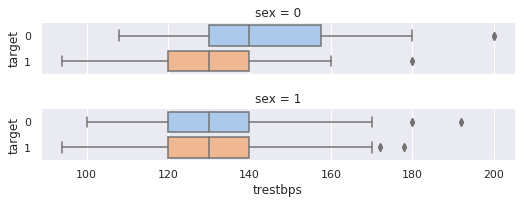

In [81]:
sns.catplot(x='trestbps',y='target',row='sex',kind='box',orient='h',height=1.5,aspect=5,data=dataset,palette='pastel')

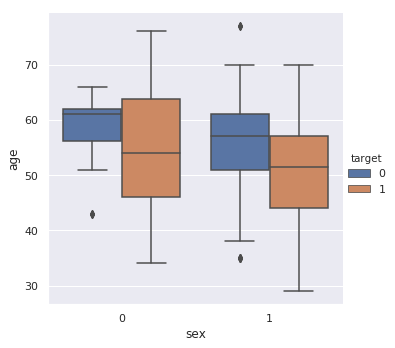

In [82]:
sns.catplot(x='sex',y='age',data=dataset,hue='target',kind='box')

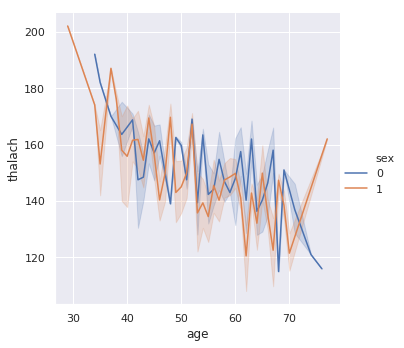

In [83]:
sns.relplot(x='age',y='thalach',hue='sex',data=dataset,kind='line')

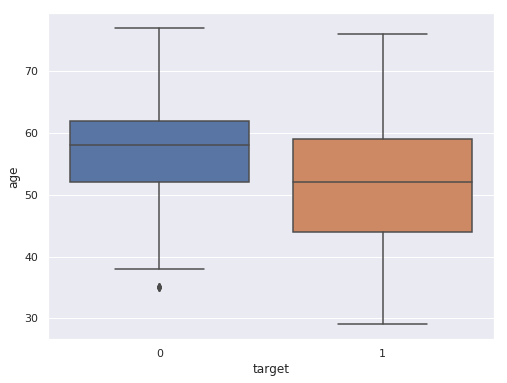

In [84]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=dataset)
plt.show()

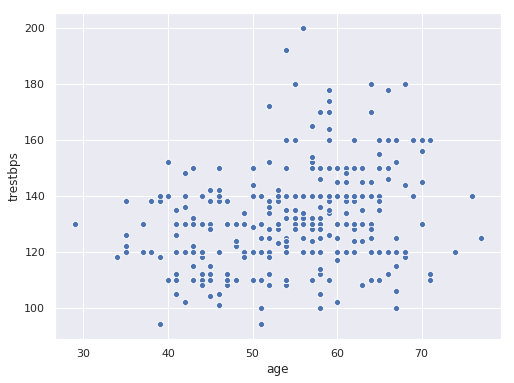

In [85]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="trestbps", data=dataset)
plt.show()

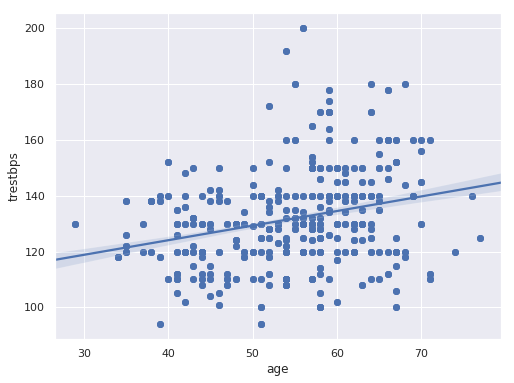

In [86]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=dataset)
plt.show()

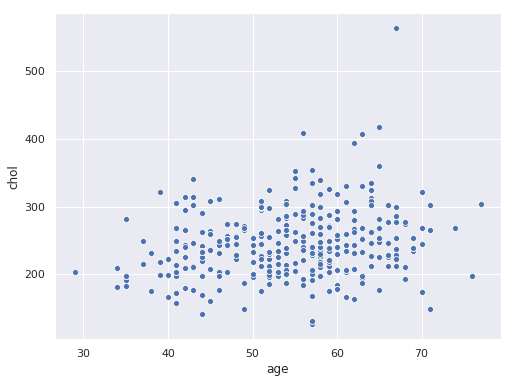

In [87]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=dataset)
plt.show()

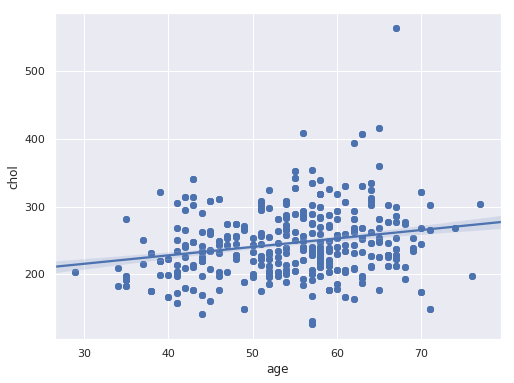

In [88]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=dataset)
plt.show()

In [89]:
dataset['max_heart_rate'] = 220 - dataset['age']
dataset['peak_to_max_ratio'] = dataset['thalach']/dataset['max_heart_rate']

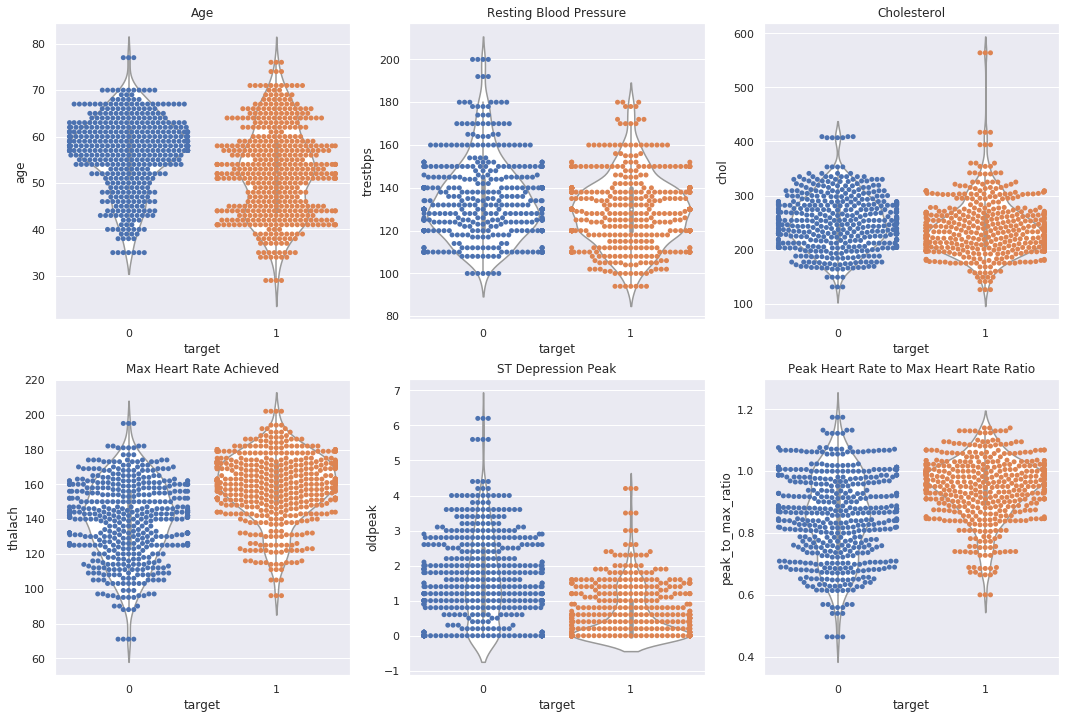

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
sns.violinplot(x="target", y="age", data=dataset,color = 'white',edgecolor = 'black',ax=axes[0][0]).set_title('Age')
sns.swarmplot(x="target", y="age", data=dataset,ax = axes[0][0])

sns.violinplot(x="target", y="trestbps", data=dataset,color = 'white',edgecolor = 'black',ax = axes[0][1]).set_title('Resting Blood Pressure')
sns.swarmplot(x="target", y="trestbps", data=dataset,ax = axes[0][1])

sns.violinplot(x="target", y="chol", data=dataset,color = 'white',edgecolor = 'black',ax = axes[0][2]).set_title('Cholesterol')
sns.swarmplot(x="target", y="chol", data=dataset,ax = axes[0][2])

sns.violinplot(x="target", y="thalach", data=dataset,color = 'white',edgecolor = 'black',ax = axes[1][0]).set_title('Max Heart Rate Achieved')
sns.swarmplot(x="target", y="thalach", data=dataset,ax = axes[1][0])

sns.violinplot(x="target", y="oldpeak", data=dataset,color = 'white',edgecolor = 'black',ax = axes[1][1]).set_title('ST Depression Peak')
sns.swarmplot(x="target", y="oldpeak", data=dataset,ax = axes[1][1])

sns.violinplot(x="target", y="peak_to_max_ratio", data=dataset,color = 'white',edgecolor = 'black',ax = axes[1][2]).set_title('Peak Heart Rate to Max Heart Rate Ratio')
sns.swarmplot(x="target", y="peak_to_max_ratio", data=dataset,ax = axes[1][2])

Text(0.5,1,'resting electrocardiographic results vs Heart Disease')

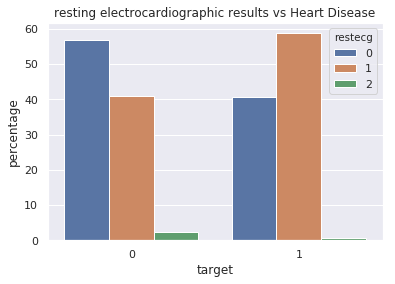

In [91]:
temp = (dataset.groupby(['target']))['restecg'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "target", y = "percentage", hue = "restecg", data = temp)\
.set_title("resting electrocardiographic results vs Heart Disease")

Text(0.5,1,'Exang 0:No Angina,1:Yes Angina')

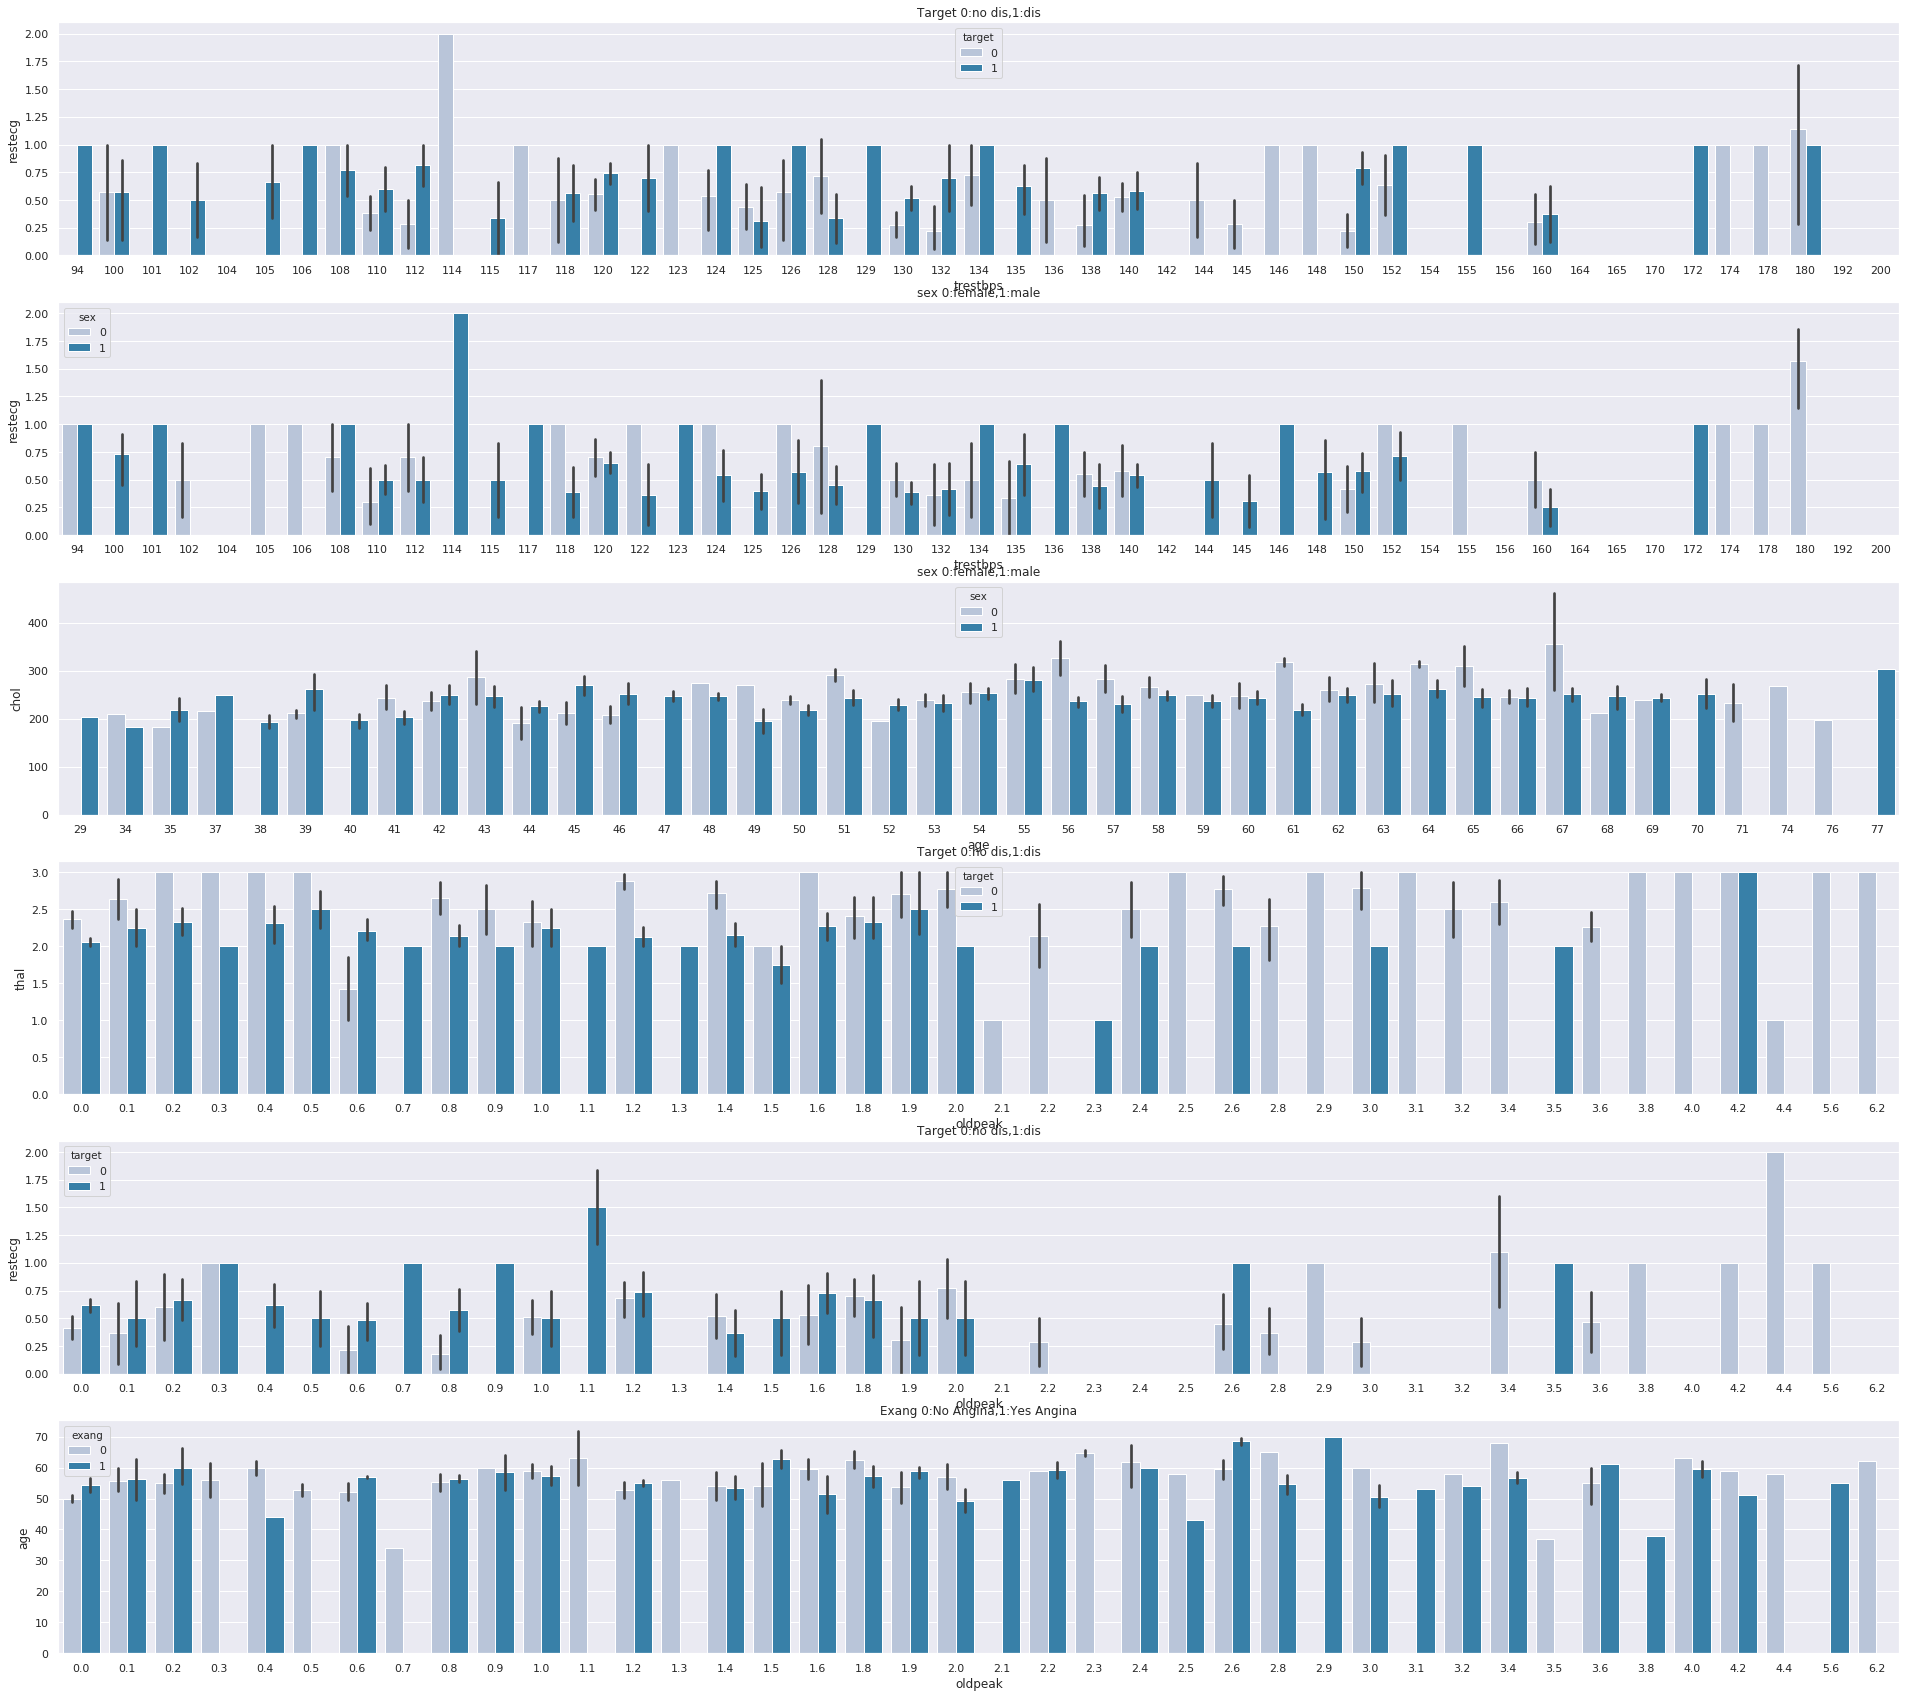

In [92]:
fig,ax=plt.subplots(figsize=(33,30))
plt.subplot(611)
bx_1 = sns.barplot(x="trestbps", y="restecg", hue="target", data=dataset,palette="PuBu")
bx_1.set_title("Target 0:no dis,1:dis")

plt.subplot(612)
bx_2 = sns.barplot(x="trestbps", y="restecg", hue="sex", data=dataset,palette="PuBu")
bx_2.set_title("sex 0:female,1:male")

plt.subplot(613)
bx_3 = sns.barplot(x="age", y="chol", hue="sex", data=dataset,palette="PuBu")
bx_3.set_title("sex 0:female,1:male")

plt.subplot(614)
bx_4 = sns.barplot(x="oldpeak", y="thal", hue="target", data=dataset,palette="PuBu")
bx_4.set_title("Target 0:no dis,1:dis")

plt.subplot(615)
bx_5 = sns.barplot(x="oldpeak", y="restecg", hue="target", data=dataset,palette="PuBu")
bx_5.set_title("Target 0:no dis,1:dis")

plt.subplot(616)
bx_6 = sns.barplot(x="oldpeak", y="age", hue="exang", data=dataset,palette="PuBu")
bx_6.set_title("Exang 0:No Angina,1:Yes Angina")